# **Actividad 2: Convolutional Neural Networks**


En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar imágenes de personajes de la conocida serie de los Simpsons.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en imágenes de personajes de los Simpsons extraídas directamente de capítulos de la serie. Este dataset ha sido recopilado por [Alexandre Attia](http://www.alexattia.fr/) y es más complejo que el dataset de Fashion MNIST que hemos utilizado hasta ahora. Aparte de tener más clases (vamos a utilizar los 18 personajes con más imágenes), los personajes pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros personajes en pantalla (si bien el personaje a clasificar siempre aparece en la posición predominante).

El dataset de training puede ser descargado desde aquí:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

Por otro lado, el dataset de test puede ser descargado de aquí:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)

Antes de empezar la práctica, se recomienda descargar las imágenes y echarlas un vistazo.


## Carga de los datos

In [ ]:
import cv2
import os
import numpy as np 
import tensorflow as tf
from tensorflow import keras
#import keras
import matplotlib.pyplot as plt
import glob


# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets

# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

10665984/10658925 [==============================] - 3s 0us/step


In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)


In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [ ]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

## Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas: 
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que nuestro modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting. Una posible partición puede ser 80 / 20.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como hemos hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

## **Imports**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import itertools
import pandas as pd
from tensorflow.keras.regularizers import l2
from google.colab.patches import cv2_imshow

In [ ]:
def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  '''
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  #print(cm)
  '''
  plt.figure(figsize=(8,8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

def get_metrics(y_test, y_pred,labels):
  recall = recall_score(y_true = y_test, y_pred = y_pred, labels = labels,average = None)
  precision = precision_score(y_true = y_test, y_pred = y_pred, labels = labels,average = None)
  return recall, precision

def get_acc(conf_matrix):
  accuracy = []
  for i in range(0,conf_matrix.shape[0]):
    accuracy.append(conf_matrix[i][i]/conf_matrix[i][:].sum()) 
  return accuracy

In [ ]:
def splitTrainingValidation(x_trainSet, y_trainSet, porcentaje = 0.2):
    #Comprobamos si tienen la misma longitud x e y
    if len(x_trainSet) != len(y_trainSet):
        print("x e y no tiene los mismo elementos")
        return
    #Primero permutamos los elementos
    count = len(x_trainSet)
    permutation = np.random.permutation(count)
    x_trainSet_permuted = x_trainSet[permutation]
    y_trainSet_permuted = y_trainSet[permutation]
    #Calculamos cuantos elementos tiene el training y cuantos el validation
    numberElementTraining = int(count*(1.0-porcentaje))
    #Devolvemos x_training, y_training, x_validation, y_validation
    return x_trainSet_permuted[:numberElementTraining], y_trainSet_permuted[:numberElementTraining], x_trainSet_permuted[numberElementTraining:], y_trainSet_permuted[numberElementTraining:]

In [ ]:
def metrics(model):
    eval = model.evaluate(X_t,y_t,return_dict=True,verbose=0)
    print(eval)
    yhat = model.predict(X_t)
    # Calculate and plot
    conf_matrix = confusion_matrix(y_t, yhat.argmax(axis=1))
    plot_confusion_matrix(conf_matrix, MAP_CHARACTERS.values(),normalize= False,  title='Confusion matrix')
    # Get recall and precision of each class and show it in a dataframe
    recall, precision =  get_metrics(y_t,yhat.argmax(axis=1),labels = [str(x) for x in range(18)])
    metrics_dict = {'characters': MAP_CHARACTERS.values(), 'recall': recall, 'precision': precision}
    metrics_df = pd.DataFrame(metrics_dict)
    return metrics_df

In [ ]:
def showImageError(model):
    prediccion = model.predict(X_t)
    prediccion = np.argmax(prediccion,axis=1)
    X_errores = X_t[prediccion != y_t]
    y_errores = prediccion[prediccion != y_t]
    y_correctos = y_t[prediccion != y_t]
    for i in range(len(X_errores)):
        cv2_imshow(X_errores[i]*255)
        print("Prediccion: ",MAP_CHARACTERS[y_errores[i]])
        print("Correcto: ", MAP_CHARACTERS[y_correctos[i]])

## **Analisis de datos**


Primero se analizan los tamaños de los datos datos X, que en este caso se corresponden a las imagenes del dataset.

In [ ]:
X.shape

(18992, 64, 64, 3)

Hay un total de 18992 imagenes de entrenamiento con un tamaño de 64x64 y con 3 canales cada imagen, correspondientes a los colores RGB.



In [ ]:
X_t.shape

(890, 64, 64, 3)

En el caso de los datos de test, hay un total de 890 imagenes de las mismas características que las imagenes de training.

In [ ]:
X[0].size

12288

Cada imagen tiene un total de 12288 píxeles, correspondiente a la multiplicación de 64x64.

Se observan los valores máximos y mínimos de las imagenes.

In [ ]:
np.amin(X)

0

El valor mínimo que obtienen los píxeles de todas las imagenes de de 0.

In [ ]:
np.amax(X)

255

El valo máximo es de 255, por lo que se deberá realizar una normalización dividiendo los valores de los píxeles por este valor.

Por último se muestra un ejemplo de una imagen del dataset.

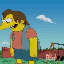

In [ ]:
cv2_imshow(X[83])

Por otro lado, se analizan los datos de y que son los corresponidentes a los labels de cada imagen. Cabe mencionar que estos tendrán la misma cantidad que los datos de X, siendo un total de 18992 para training y 890 para test.

In [ ]:
len(y)

18992

In [ ]:
len(y_t)

890

In [ ]:
print(np.amin(y))
print(np.amax(y))

0
17


Se puede ver como los labels van del valor 0 al valor 17, por lo que hay un total de 18 clases diferentes.

Por último se normalizan los datos y se dividen los datos de training en training y validación, antes de pasar al entrenamiento de las redes.

In [ ]:
X = X / 255.0
X_t = X_t / 255.0

In [ ]:
x_train, y_train, x_valid, y_valid = splitTrainingValidation(X,y)

In [ ]:
print(x_train.shape)
print(x_valid.shape)

(15193, 64, 64, 3)
(3799, 64, 64, 3)


Tenemos 15193 imágenes para entrenar y 3799 imágenes de validación.

## **Modelos**

### **CNN**

### **Modelo inicial**

Generamos un modelo que tiene dos bloques:

- En un primer bloque ponemos 4 capas convulucionales con filtros de 3x3 y 64, 64, 128 y 128 filtros, detrás de cada una ponemos una capa MaxPooling.

- En el segundo bloque primero ponemos una capa Flatten para pasarlo a un vector, despues de esta ponemos una capa Dropout con 0.5 para evitar el overfiting, luego pasamos una capa densa de 512 neuronas y finalmente una capa densa con 18 neuronas, que sera la capa de salida.

Utilizamos la funcion de activación RELU en todas las capas convolucionales y en la primera capa densa, en la ultima capa densa utilizamos la funcion de activación SoftMax.

Como optimizador se usa el SGD.

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

In [ ]:
history = model.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 4s 17ms/step - loss: 2.8740 - accuracy: 0.0769 - val_loss: 2.7905 - val_accuracy: 0.1232
Epoch 2/30
238/238 [==============================] - 4s 15ms/step - loss: 2.7932 - accuracy: 0.1177 - val_loss: 2.7760 - val_accuracy: 0.1232
Epoch 3/30
238/238 [==============================] - 4s 16ms/step - loss: 2.7773 - accuracy: 0.1177 - val_loss: 2.7502 - val_accuracy: 0.1232
Epoch 4/30
238/238 [==============================] - 4s 15ms/step - loss: 2.7491 - accuracy: 0.1305 - val_loss: 2.6577 - val_accuracy: 0.1911
Epoch 5/30
238/238 [==============================] - 4s 15ms/step - loss: 2.6525 - accuracy: 0.1841 - val_loss: 2.5004 - val_accuracy: 0.2085
Epoch 6/30
238/238 [==============================] - 4s 15ms/step - loss: 2.5071 - accuracy: 0.2205 - val_loss: 2.3708 - val_accuracy: 0.2695
Epoch 7/30
238/238 [==============================] - 4s 15ms/step - loss: 2.3886 - accuracy: 0.2579 - val_loss: 2.2468 - val_accuracy: 0.2838

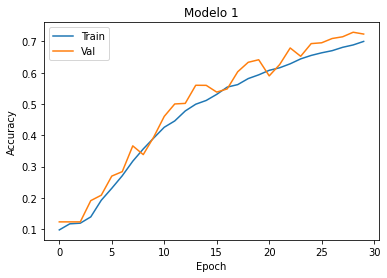

In [ ]:
plot_acc(history,"Modelo 1")

{'loss': 0.8924750685691833, 'accuracy': 0.7415730357170105}


,characters,recall,precision
0,abraham_grampa_simpson,0.645833,0.673913
1,apu_nahasapeemapetilon,0.860000,0.977273
2,bart_simpson,0.580000,0.580000
3,charles_montgomery_burns,0.583333,0.636364
4,chief_wiggum,0.900000,0.789474
5,comic_book_guy,0.428571,0.913043
6,edna_krabappel,0.680000,0.790698
7,homer_simpson,0.880000,0.523810
8,kent_brockman,0.820000,0.854167
9,krusty_the_clown,0.940000,0.783333


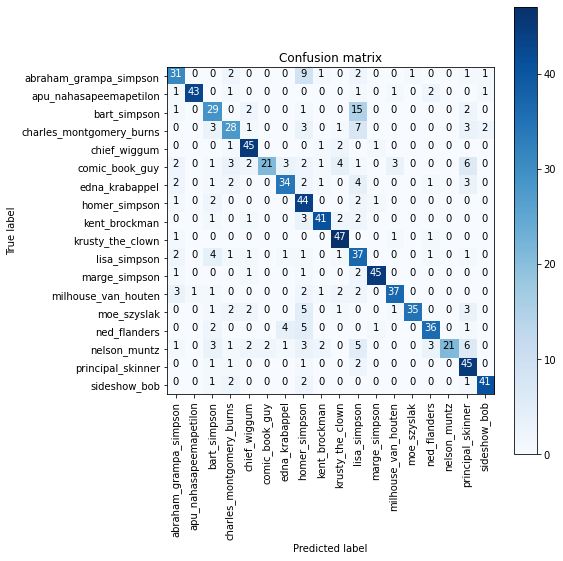

In [ ]:
metrics(model)

### **Modelo 2**

En este segundo modelo se aplican el uso del optimizador adam, además de la regularización L2 en el cuarto filtro convolucional.

In [ ]:
model2 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])

In [ ]:
history2 = model2.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 5s 18ms/step - loss: 2.7236 - accuracy: 0.1551 - val_loss: 1.8997 - val_accuracy: 0.4393
Epoch 2/30
238/238 [==============================] - 4s 16ms/step - loss: 1.7122 - accuracy: 0.4795 - val_loss: 1.2518 - val_accuracy: 0.6399
Epoch 3/30
238/238 [==============================] - 4s 16ms/step - loss: 1.1659 - accuracy: 0.6565 - val_loss: 0.8532 - val_accuracy: 0.7557
Epoch 4/30
238/238 [==============================] - 4s 16ms/step - loss: 0.9287 - accuracy: 0.7327 - val_loss: 0.7521 - val_accuracy: 0.7918
Epoch 5/30
238/238 [==============================] - 4s 16ms/step - loss: 0.7454 - accuracy: 0.7823 - val_loss: 0.6875 - val_accuracy: 0.8178
Epoch 6/30
238/238 [==============================] - 4s 16ms/step - loss: 0.6329 - accuracy: 0.8224 - val_loss: 0.6518 - val_accuracy: 0.8215
Epoch 7/30
238/238 [==============================] - 4s 16ms/step - loss: 0.5827 - accuracy: 0.8377 - val_loss: 0.6365 - val_accuracy: 0.8363

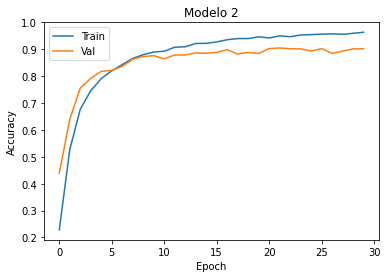

In [ ]:
plot_acc(history2,"Modelo 2")

{'loss': 0.19146817922592163, 'accuracy': 0.9617977738380432}


,characters,recall,precision
0,abraham_grampa_simpson,0.875000,1.000000
1,apu_nahasapeemapetilon,0.980000,1.000000
2,bart_simpson,0.980000,0.875000
3,charles_montgomery_burns,0.979167,0.870370
4,chief_wiggum,1.000000,1.000000
5,comic_book_guy,0.979592,0.941176
6,edna_krabappel,0.940000,0.979167
7,homer_simpson,1.000000,0.862069
8,kent_brockman,0.960000,1.000000
9,krusty_the_clown,1.000000,1.000000


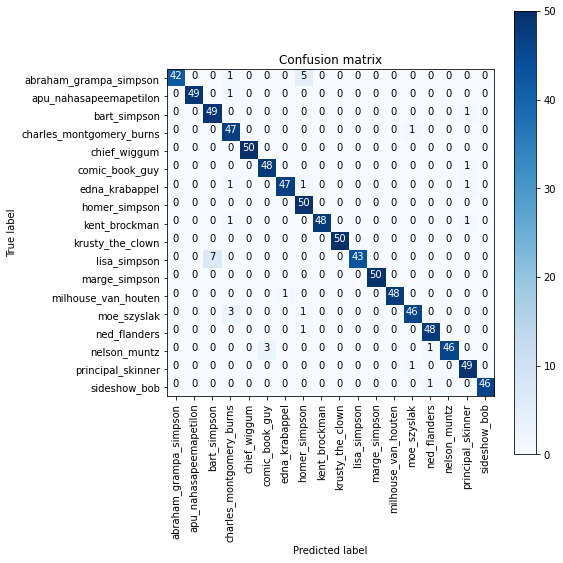

In [ ]:
metrics(model2)

### **Modelo 3**

En este modelo los cambios realizados son utilizar el optimizador de tipo adam, añadir un mayor número de filtros convolucionales antes de las capas max pooling, además de utilizar regularización L2 y cambiar el número de neuronas de la capa fully connected.

In [ ]:
model3 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])

In [ ]:
history3 = model3.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 42s 38ms/step - loss: 2.8465 - accuracy: 0.1158 - val_loss: 2.4599 - val_accuracy: 0.2516
Epoch 2/30
238/238 [==============================] - 8s 33ms/step - loss: 2.2867 - accuracy: 0.2853 - val_loss: 1.7245 - val_accuracy: 0.4641
Epoch 3/30
238/238 [==============================] - 8s 33ms/step - loss: 1.6536 - accuracy: 0.4838 - val_loss: 1.2426 - val_accuracy: 0.6402
Epoch 4/30
238/238 [==============================] - 8s 33ms/step - loss: 1.2390 - accuracy: 0.6201 - val_loss: 0.9909 - val_accuracy: 0.7062
Epoch 5/30
238/238 [==============================] - 8s 33ms/step - loss: 1.0456 - accuracy: 0.6867 - val_loss: 0.9218 - val_accuracy: 0.7344
Epoch 6/30
238/238 [==============================] - 8s 33ms/step - loss: 0.8819 - accuracy: 0.7535 - val_loss: 0.8347 - val_accuracy: 0.7823
Epoch 7/30
238/238 [==============================] - 8s 33ms/step - loss: 0.7489 - accuracy: 0.7911 - val_loss: 0.6707 - val_accuracy: 0.826

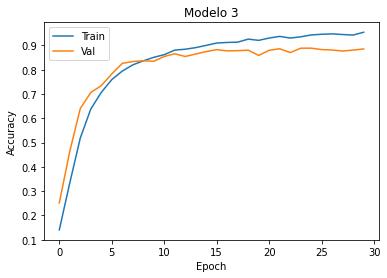

In [ ]:
plot_acc(history3,"Modelo 3")

{'loss': 0.2927066683769226, 'accuracy': 0.95168536901474}


,characters,recall,precision
0,abraham_grampa_simpson,0.895833,1.000000
1,apu_nahasapeemapetilon,0.980000,1.000000
2,bart_simpson,0.980000,0.924528
3,charles_montgomery_burns,0.916667,0.846154
4,chief_wiggum,0.980000,0.980000
5,comic_book_guy,0.897959,0.897959
6,edna_krabappel,0.920000,0.978723
7,homer_simpson,0.960000,0.905660
8,kent_brockman,1.000000,1.000000
9,krusty_the_clown,1.000000,0.943396


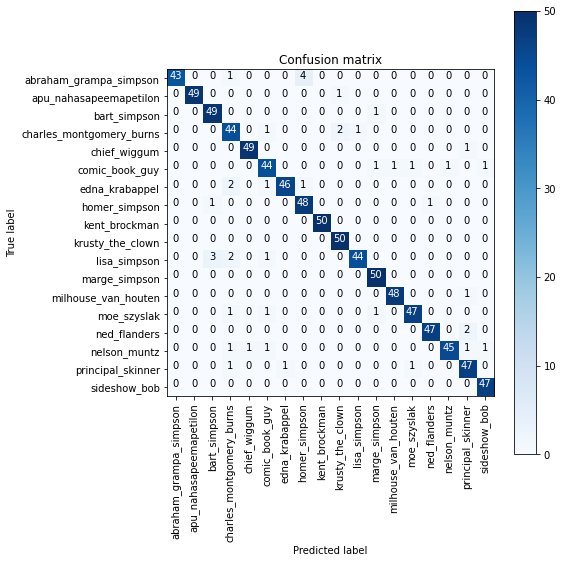

In [ ]:
metrics(model3)

### **Modelo 4**

En este utilizamos al principio de la red densa una capa de batch normalization para reducir el overfitting provocado por las capas convolucionales.

In [ ]:
model4 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
history4 = model4.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 9s 34ms/step - loss: 2.6433 - accuracy: 0.2012 - val_loss: 2.3634 - val_accuracy: 0.2993
Epoch 2/30
238/238 [==============================] - 8s 33ms/step - loss: 1.9523 - accuracy: 0.4006 - val_loss: 1.6990 - val_accuracy: 0.4888
Epoch 3/30
238/238 [==============================] - 8s 33ms/step - loss: 1.4487 - accuracy: 0.5583 - val_loss: 1.4520 - val_accuracy: 0.5717
Epoch 4/30
238/238 [==============================] - 8s 33ms/step - loss: 1.0907 - accuracy: 0.6689 - val_loss: 0.8538 - val_accuracy: 0.7539
Epoch 5/30
238/238 [==============================] - 8s 33ms/step - loss: 0.8581 - accuracy: 0.7513 - val_loss: 0.7199 - val_accuracy: 0.7971
Epoch 6/30
238/238 [==============================] - 8s 33ms/step - loss: 0.7107 - accuracy: 0.7992 - val_loss: 0.6572 - val_accuracy: 0.8173
Epoch 7/30
238/238 [==============================] - 8s 33ms/step - loss: 0.6260 - accuracy: 0.8279 - val_loss: 0.7105 - val_accuracy: 0.8071

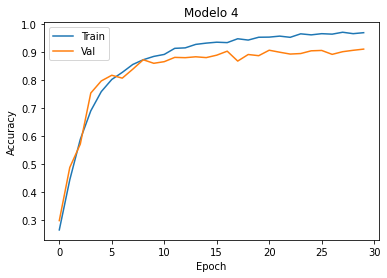

In [ ]:
plot_acc(history4,"Modelo 4")

{'loss': 0.28235921263694763, 'accuracy': 0.9595505595207214}


,characters,recall,precision
0,abraham_grampa_simpson,0.979167,0.959184
1,apu_nahasapeemapetilon,1.000000,0.980392
2,bart_simpson,0.980000,0.924528
3,charles_montgomery_burns,0.958333,0.867925
4,chief_wiggum,1.000000,0.961538
5,comic_book_guy,0.938776,0.938776
6,edna_krabappel,0.920000,0.978723
7,homer_simpson,0.980000,0.907407
8,kent_brockman,0.980000,1.000000
9,krusty_the_clown,1.000000,1.000000


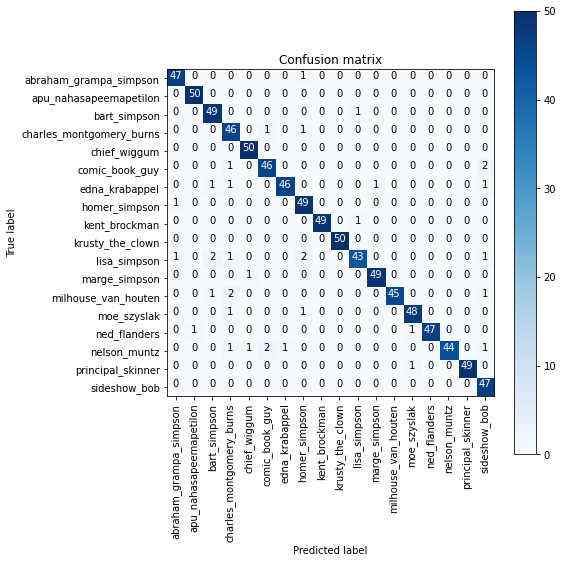

In [ ]:
metrics(model4)

### **Modelo 5**

En esta utilizamos capas de dropout al principio de cada bloque convolucional. Además, eliminamos la regularización L2 de los kernels. El motivo de probar esta arquitectura es para averiguar si se reduce el overfitting al añadir un mayor número de capas dropout, aunque a priori, el uso de las capas dropout parece no tener efecto dentro de una red convolucional, pero se pretende experimentar con ello.

In [ ]:

model5 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

model5.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
history5 = model5.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 9s 36ms/step - loss: 2.6638 - accuracy: 0.1535 - val_loss: 2.6167 - val_accuracy: 0.2767
Epoch 2/30
238/238 [==============================] - 8s 34ms/step - loss: 1.9930 - accuracy: 0.3632 - val_loss: 1.7320 - val_accuracy: 0.4904
Epoch 3/30
238/238 [==============================] - 8s 34ms/step - loss: 1.5528 - accuracy: 0.5100 - val_loss: 1.3496 - val_accuracy: 0.5696
Epoch 4/30
238/238 [==============================] - 8s 34ms/step - loss: 1.2536 - accuracy: 0.6013 - val_loss: 1.0031 - val_accuracy: 0.6831
Epoch 5/30
238/238 [==============================] - 8s 34ms/step - loss: 1.0465 - accuracy: 0.6717 - val_loss: 0.8778 - val_accuracy: 0.7362
Epoch 6/30
238/238 [==============================] - 8s 34ms/step - loss: 0.8601 - accuracy: 0.7285 - val_loss: 0.7149 - val_accuracy: 0.7752
Epoch 7/30
238/238 [==============================] - 8s 34ms/step - loss: 0.7689 - accuracy: 0.7614 - val_loss: 0.6988 - val_accuracy: 0.7918

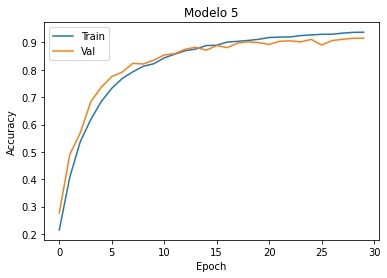

In [ ]:
plot_acc(history5,"Modelo 5")

{'loss': 0.16161994636058807, 'accuracy': 0.9573033452033997}


,characters,recall,precision
0,abraham_grampa_simpson,1.000000,0.960000
1,apu_nahasapeemapetilon,1.000000,0.980392
2,bart_simpson,0.900000,0.957447
3,charles_montgomery_burns,0.958333,1.000000
4,chief_wiggum,0.960000,1.000000
5,comic_book_guy,0.938776,0.958333
6,edna_krabappel,0.880000,1.000000
7,homer_simpson,0.940000,0.921569
8,kent_brockman,0.940000,0.979167
9,krusty_the_clown,0.980000,1.000000


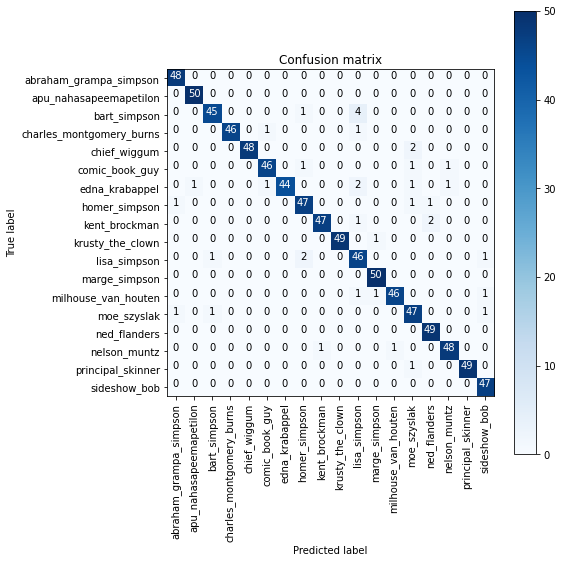

In [ ]:
metrics(model5)

### **Modelo 6**

En este modelo se le añaden capas convolucionales antes de las de MaxPooling, donde se usa el regularizador L2, además se usan capas de batch normalization. También se expande la parte de la fully connected.

In [ ]:
model6 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    #tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

model6.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
history6 = model6.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 42s 36ms/step - loss: 2.4675 - accuracy: 0.2733 - val_loss: 3.2482 - val_accuracy: 0.0408
Epoch 2/30
238/238 [==============================] - 7s 31ms/step - loss: 1.2868 - accuracy: 0.6402 - val_loss: 1.2851 - val_accuracy: 0.6562
Epoch 3/30
238/238 [==============================] - 7s 31ms/step - loss: 0.9455 - accuracy: 0.7410 - val_loss: 1.1553 - val_accuracy: 0.6910
Epoch 4/30
238/238 [==============================] - 7s 31ms/step - loss: 0.7769 - accuracy: 0.7964 - val_loss: 1.0757 - val_accuracy: 0.7207
Epoch 5/30
238/238 [==============================] - 7s 31ms/step - loss: 0.6225 - accuracy: 0.8458 - val_loss: 1.0714 - val_accuracy: 0.7636
Epoch 6/30
238/238 [==============================] - 8s 32ms/step - loss: 0.5681 - accuracy: 0.8647 - val_loss: 0.7891 - val_accuracy: 0.8068
Epoch 7/30
238/238 [==============================] - 8s 32ms/step - loss: 0.4924 - accuracy: 0.8851 - val_loss: 0.8226 - val_accuracy: 0.800

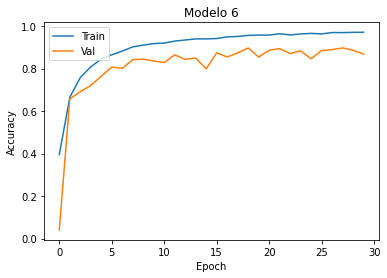

In [ ]:
plot_acc(history6,"Modelo 6")

{'loss': 0.4339218735694885, 'accuracy': 0.9235954880714417}


,characters,recall,precision
0,abraham_grampa_simpson,0.708333,0.944444
1,apu_nahasapeemapetilon,0.960000,1.000000
2,bart_simpson,0.860000,0.895833
3,charles_montgomery_burns,0.958333,0.884615
4,chief_wiggum,0.940000,1.000000
5,comic_book_guy,0.938776,0.920000
6,edna_krabappel,0.780000,0.928571
7,homer_simpson,0.980000,0.742424
8,kent_brockman,0.980000,0.960784
9,krusty_the_clown,1.000000,1.000000


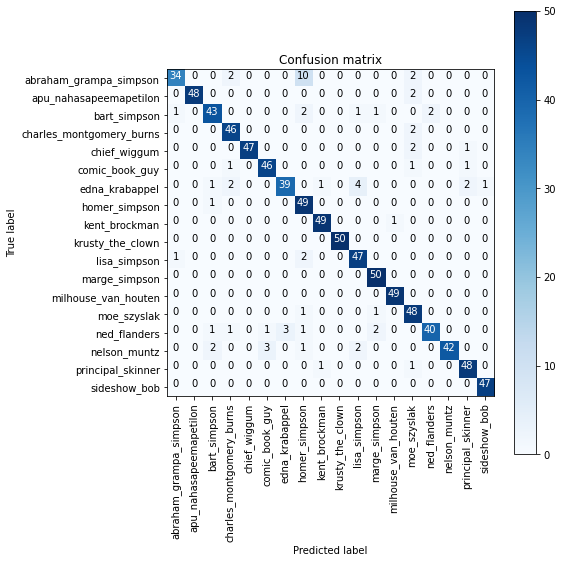

In [ ]:
metrics(model6)

### **Modelo 7**
En el siguiente modelo se ha utilizado el optimizado RMS prop con un Learning rate de 0.001 y un reductor de la tasa de aprendizaje en cada actualización de 1e-6.
Observamos una fluctuación de precisión en los datos de validación a lo largo de las epochs.


In [ ]:
model7 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

In [ ]:
optimizer = RMSprop(lr=0.001, decay=1e-6)

In [ ]:
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer= optimizer,
              metrics =["accuracy"])

In [ ]:
history7 = model7.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 10s 36ms/step - loss: 2.6280 - accuracy: 0.1714 - val_loss: 2.5535 - val_accuracy: 0.1756
Epoch 2/30
238/238 [==============================] - 8s 35ms/step - loss: 1.7336 - accuracy: 0.4549 - val_loss: 1.5890 - val_accuracy: 0.5186
Epoch 3/30
238/238 [==============================] - 8s 35ms/step - loss: 1.2046 - accuracy: 0.6305 - val_loss: 0.9330 - val_accuracy: 0.7107
Epoch 4/30
238/238 [==============================] - 8s 35ms/step - loss: 0.9468 - accuracy: 0.7144 - val_loss: 0.6489 - val_accuracy: 0.8049
Epoch 5/30
238/238 [==============================] - 8s 35ms/step - loss: 0.7693 - accuracy: 0.7650 - val_loss: 1.7370 - val_accuracy: 0.6128
Epoch 6/30
238/238 [==============================] - 8s 35ms/step - loss: 0.6520 - accuracy: 0.8076 - val_loss: 0.7494 - val_accuracy: 0.7997
Epoch 7/30
238/238 [==============================] - 8s 34ms/step - loss: 0.5687 - accuracy: 0.8318 - val_loss: 0.6726 - val_accuracy: 0.817

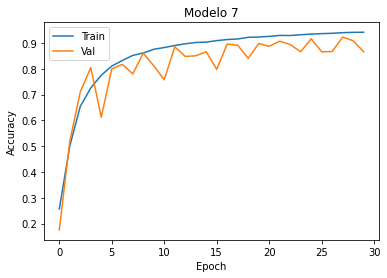

In [ ]:
plot_acc(history7,"Modelo 7")

{'loss': 0.3111659288406372, 'accuracy': 0.9033707976341248}


,characters,recall,precision
0,abraham_grampa_simpson,0.750000,0.947368
1,apu_nahasapeemapetilon,0.960000,1.000000
2,bart_simpson,0.920000,0.978723
3,charles_montgomery_burns,0.875000,0.857143
4,chief_wiggum,0.920000,0.958333
5,comic_book_guy,0.897959,0.721311
6,edna_krabappel,0.880000,1.000000
7,homer_simpson,0.920000,0.779661
8,kent_brockman,0.900000,1.000000
9,krusty_the_clown,1.000000,0.819672


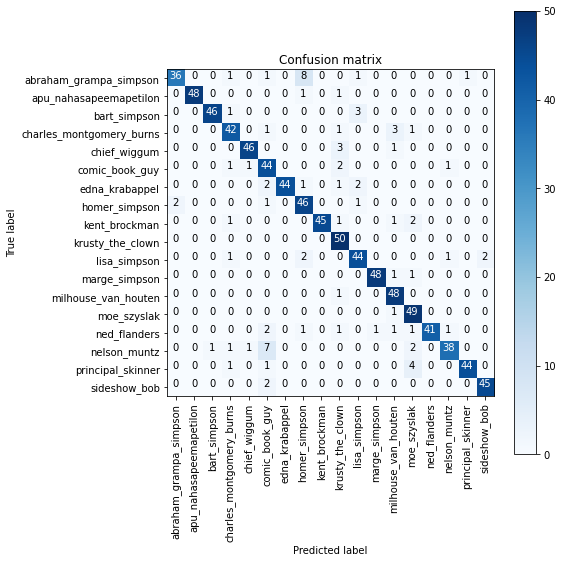

In [ ]:
metrics(model7)

### **Modelo 8**

 En este modelo se ha probado a utilizar Data Augmentation y el optimizador Adam. Además se ha aumentado el número de epochs de entrenamiento a 100.

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(rescale = None,
                                   rotation_range = 30,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.3,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
datagen_val = ImageDataGenerator(rescale=None)

train_generator = datagen.flow(X_train,Y_train)
validation_generator = datagen_val.flow(X_validation,Y_validation)

In [ ]:
model8 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])
model8.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics =["accuracy"])

In [ ]:
history8 = model8.fit(train_generator, epochs=100, validation_data=validation_generator,batch_size=64)

Epoch 1/100
190/190 [==============================] - 47s 76ms/step - loss: 2.7618 - accuracy: 0.1276 - val_loss: 2.2656 - val_accuracy: 0.2582
Epoch 2/100
190/190 [==============================] - 15s 77ms/step - loss: 2.2274 - accuracy: 0.3009 - val_loss: 1.7240 - val_accuracy: 0.4690
Epoch 3/100
190/190 [==============================] - 14s 75ms/step - loss: 1.7534 - accuracy: 0.4481 - val_loss: 1.2918 - val_accuracy: 0.6034
Epoch 4/100
190/190 [==============================] - 14s 75ms/step - loss: 1.4037 - accuracy: 0.5563 - val_loss: 1.2074 - val_accuracy: 0.6430
Epoch 5/100
190/190 [==============================] - 14s 74ms/step - loss: 1.2613 - accuracy: 0.6142 - val_loss: 1.0070 - val_accuracy: 0.7049
Epoch 6/100
190/190 [==============================] - 14s 75ms/step - loss: 1.1329 - accuracy: 0.6529 - val_loss: 0.9360 - val_accuracy: 0.7260
Epoch 7/100
190/190 [==============================] - 14s 75ms/step - loss: 1.0541 - accuracy: 0.6825 - val_loss: 0.8279 - val_ac

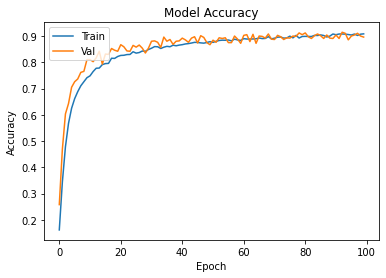

In [ ]:
plot_acc(history8)

{'loss': 0.1471141278743744, 'accuracy': 0.9539325833320618}


,characters,recall,precision
0,abraham_grampa_simpson,0.916667,0.936170
1,apu_nahasapeemapetilon,0.980000,1.000000
2,bart_simpson,0.920000,0.958333
3,charles_montgomery_burns,0.958333,0.836364
4,chief_wiggum,0.940000,0.959184
5,comic_book_guy,0.918367,0.957447
6,edna_krabappel,0.940000,1.000000
7,homer_simpson,0.940000,0.870370
8,kent_brockman,0.980000,0.960784
9,krusty_the_clown,1.000000,0.980392


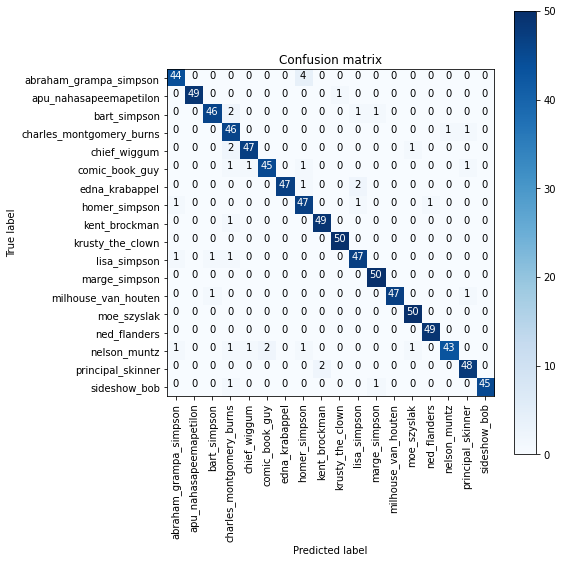

In [ ]:
metrics(model8)

### **Modelo 9**

Para este modelo se usa también el data aumentation, pero se añaden ciertos cambios en el uso de la herramienta para poder ver como cambia.

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train,y_train)
validation_generator = validation_datagen.flow(x_valid,y_valid)

In [ ]:
model9 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 64x64 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(MAP_CHARACTERS), activation='softmax')
])

model9.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
model9.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
history9 = model9.fit(train_generator, epochs=50, validation_data=validation_generator,batch_size=32)

Epoch 1/50
475/475 [==============================] - 18s 37ms/step - loss: 2.6643 - accuracy: 0.1611 - val_loss: 1.7120 - val_accuracy: 0.4491
Epoch 2/50
475/475 [==============================] - 18s 38ms/step - loss: 1.8846 - accuracy: 0.4079 - val_loss: 1.1477 - val_accuracy: 0.6475
Epoch 3/50
475/475 [==============================] - 17s 37ms/step - loss: 1.4367 - accuracy: 0.5564 - val_loss: 0.8858 - val_accuracy: 0.7241
Epoch 4/50
475/475 [==============================] - 17s 37ms/step - loss: 1.2194 - accuracy: 0.6280 - val_loss: 0.7239 - val_accuracy: 0.7799
Epoch 5/50
475/475 [==============================] - 17s 37ms/step - loss: 1.0395 - accuracy: 0.6790 - val_loss: 0.6779 - val_accuracy: 0.7799
Epoch 6/50
475/475 [==============================] - 18s 37ms/step - loss: 0.9439 - accuracy: 0.7075 - val_loss: 0.6212 - val_accuracy: 0.8126
Epoch 7/50
475/475 [==============================] - 17s 37ms/step - loss: 0.9164 - accuracy: 0.7165 - val_loss: 0.5437 - val_accuracy:

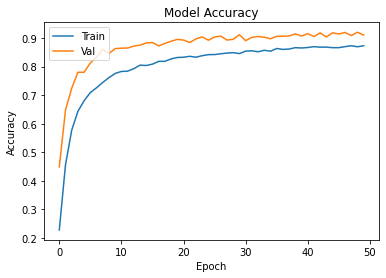

In [ ]:
plot_acc(history9)

{'loss': 0.2202346920967102, 'accuracy': 0.9393258690834045}


,characters,recall,precision
0,abraham_grampa_simpson,0.875000,0.976744
1,apu_nahasapeemapetilon,1.000000,0.943396
2,bart_simpson,0.920000,0.938776
3,charles_montgomery_burns,0.937500,0.937500
4,chief_wiggum,0.940000,0.959184
5,comic_book_guy,0.877551,0.955556
6,edna_krabappel,0.880000,0.977778
7,homer_simpson,0.940000,0.870370
8,kent_brockman,0.940000,0.921569
9,krusty_the_clown,0.980000,0.960784


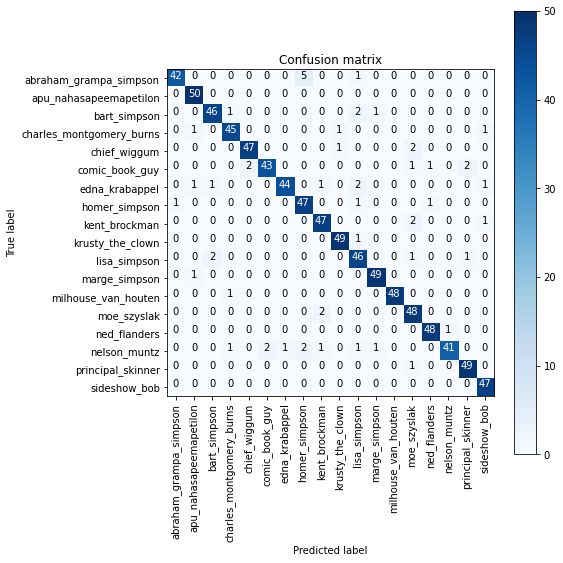

In [ ]:
metrics(model9)

Vemos que aunque el accuracy de entrenamiento no aumenta tanto si que lo hace el de validación. Esto es porque al tener muchas mas imágenes para entrenar, que son recortes o ampliaciones de las de entrenamiento puede que en algunas ni si quiera aparezca el personaje. Aún asi el accuracy de validación supera un poco a cuando no utilizamos Data Augmentation.

### **Modelo 10**

Se sigue usando data aumentation para entrenar el modelo, pero en este caso se cambia el temaño de el primer y último filtro.

In [ ]:
model10 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 64x64 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(MAP_CHARACTERS), activation='softmax')
])

model10.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])

In [ ]:
history10 = model10.fit(train_generator, epochs=50, validation_data=validation_generator,batch_size=32)

Epoch 1/50
475/475 [==============================] - 18s 35ms/step - loss: 2.7173 - accuracy: 0.1471 - val_loss: 1.7821 - val_accuracy: 0.4404
Epoch 2/50
475/475 [==============================] - 17s 35ms/step - loss: 1.9465 - accuracy: 0.3962 - val_loss: 1.2789 - val_accuracy: 0.5923
Epoch 3/50
475/475 [==============================] - 17s 35ms/step - loss: 1.5248 - accuracy: 0.5212 - val_loss: 1.0374 - val_accuracy: 0.6847
Epoch 4/50
475/475 [==============================] - 17s 35ms/step - loss: 1.2702 - accuracy: 0.6135 - val_loss: 0.8552 - val_accuracy: 0.7423
Epoch 5/50
475/475 [==============================] - 17s 35ms/step - loss: 1.1021 - accuracy: 0.6606 - val_loss: 0.7610 - val_accuracy: 0.7673
Epoch 6/50
475/475 [==============================] - 17s 35ms/step - loss: 1.0040 - accuracy: 0.6960 - val_loss: 0.6556 - val_accuracy: 0.8018
Epoch 7/50
475/475 [==============================] - 17s 35ms/step - loss: 0.9398 - accuracy: 0.7124 - val_loss: 0.5714 - val_accuracy:

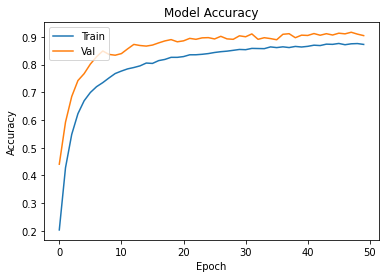

In [ ]:
plot_acc(history10)

{'loss': 0.23653562366962433, 'accuracy': 0.9303370714187622}


,characters,recall,precision
0,abraham_grampa_simpson,0.854167,0.911111
1,apu_nahasapeemapetilon,0.980000,1.000000
2,bart_simpson,0.900000,0.937500
3,charles_montgomery_burns,0.895833,0.934783
4,chief_wiggum,0.940000,0.979167
5,comic_book_guy,0.816327,0.975610
6,edna_krabappel,0.900000,0.918367
7,homer_simpson,0.880000,0.880000
8,kent_brockman,0.960000,0.941176
9,krusty_the_clown,0.980000,0.980000


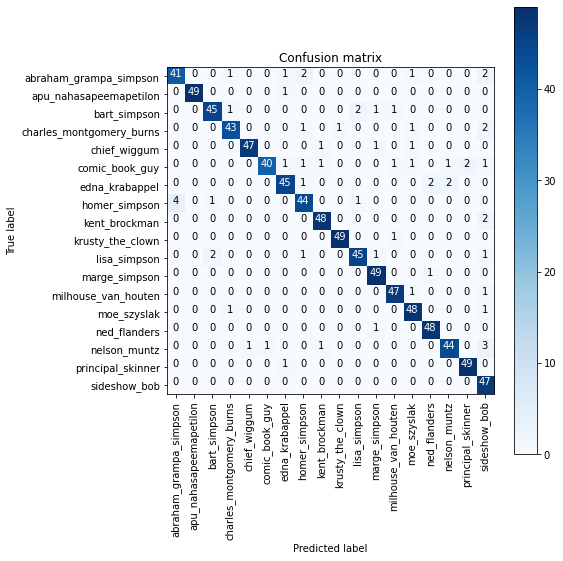

In [ ]:
metrics(model10)

### **Fully connected**

In [ ]:
model_fully = tf.keras.models.Sequential([    
    tf.keras.layers.Flatten(input_shape = (64,64,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')

])

model_fully.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
history_fully = model_fully.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/30
238/238 [==============================] - 2s 6ms/step - loss: 2.7687 - accuracy: 0.1475 - val_loss: 2.3693 - val_accuracy: 0.2503
Epoch 2/30
238/238 [==============================] - 1s 5ms/step - loss: 2.3111 - accuracy: 0.2718 - val_loss: 2.2351 - val_accuracy: 0.2935
Epoch 3/30
238/238 [==============================] - 1s 5ms/step - loss: 2.2227 - accuracy: 0.3019 - val_loss: 2.3090 - val_accuracy: 0.2843
Epoch 4/30
238/238 [==============================] - 1s 5ms/step - loss: 2.1522 - accuracy: 0.3328 - val_loss: 2.2245 - val_accuracy: 0.3209
Epoch 5/30
238/238 [==============================] - 1s 4ms/step - loss: 2.1149 - accuracy: 0.3528 - val_loss: 2.1631 - val_accuracy: 0.3330
Epoch 6/30
238/238 [==============================] - 1s 4ms/step - loss: 2.0922 - accuracy: 0.3565 - val_loss: 2.1479 - val_accuracy: 0.3372
Epoch 7/30
238/238 [==============================] - 1s 4ms/step - loss: 2.0274 - accuracy: 0.3760 - val_loss: 2.1604 - val_accuracy: 0.3348
Epoch 

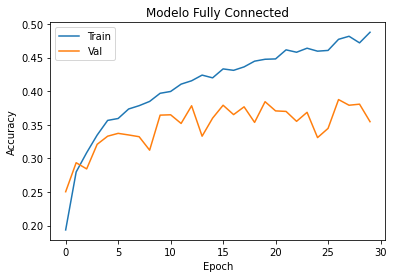

In [ ]:
plot_acc(history_fully,"Modelo Fully Connected")

{'loss': 1.9523509740829468, 'accuracy': 0.41910111904144287}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,characters,recall,precision
0,abraham_grampa_simpson,0.020833,0.500000
1,apu_nahasapeemapetilon,0.380000,0.760000
2,bart_simpson,0.200000,0.294118
3,charles_montgomery_burns,0.562500,0.337500
4,chief_wiggum,0.800000,0.425532
5,comic_book_guy,0.224490,0.578947
6,edna_krabappel,0.160000,0.800000
7,homer_simpson,0.400000,0.238095
8,kent_brockman,0.760000,0.666667
9,krusty_the_clown,0.580000,0.659091


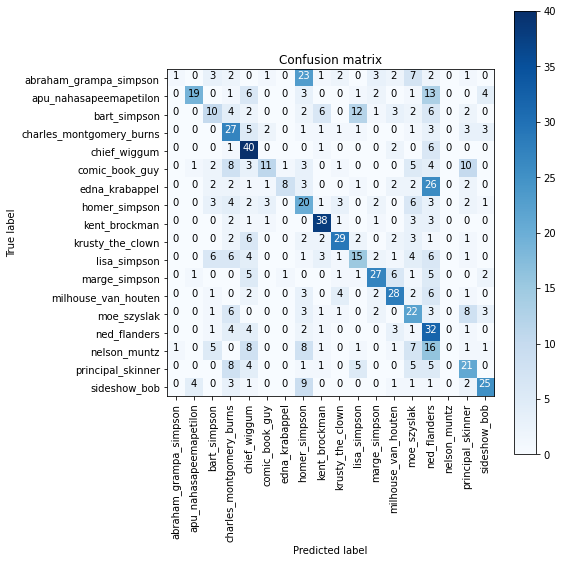

In [ ]:
metrics(model_fully)

Como se puede observar, el modelo usando solamente una red fully connected no da buenos resultados llegando solo a un 50 % de accuracy.

## **Resultados**

Una vez implementados una serie de modelos y evaluados individualmente, vamos a presentar una tabla conjunta donde compararemos los resultados obtenidos en todos ellos. Concretamente se presentarán las accuracy obtenidas tanto en entrenamiento, validación y test de cada modelo.

| Modelo          | Train Accuracy | Validation Accuracy | Test Accuracy |
|-----------------|----------------|:-------------------:|---------------|
| Modelo inicial  | 0.6966         | 0.7236              | 0.7415        |
| Modelo 2        | 0.9666         | 0.9016              | 0.9618        |
| Modelo 3        | 0.9580         | 0.8855              | 0.9516        |
| Modelo 4        | 0.9764         | 0.9105              | 0.9595        |
| Modelo 5        | 0.9374         | 0.9158              | 0.9573        |
| Modelo 6        | 0.9351         | 0.9126              | 0.9236              |
| Modelo 7        | 0.9430         | 0.8663              | 0.9033        |
| Modelo 8        | 0.9071         | 0.8959              | 0.9539        |
| Modelo 9       | 0.8709         | 0.9100              | 0.9393        |
| Modelo 10       | 0.8809         | 0.9047              | 0.9303              |
| Fully Connected | 0.4857         | 0.3546              | 0.4191        |

Observando la tabla de resultados, se puede ver que el mejor modelo ha sido el segundo, el parametro que fue de mayor ayuda en este caso fue el uso del optimizador adam, por este motivo no se ha realizado ningún modelo juntando diferentes características de todos los modelos para crear uno mejor, ya que al añadir más cosas hacían empeorar los resultados. Además, cabe mencionar que las redes en general han sufrido de poco overfitting. 

Por estos motivos, el modelo seleccionado es el modelo 2, y se muestra a continuación los resultados con el test de accuracy y loss. Y también del entrenamiento.

In [ ]:
model2.evaluate(X_t,y_t)

28/28 [==============================] - 0s 5ms/step - loss: 0.1915 - accuracy: 0.9618


[0.19146817922592163, 0.9617977738380432]

Se ve como se obtiene un accuracy del 96.18 % y un los del 19.15 %, que son muy buenos resultados.

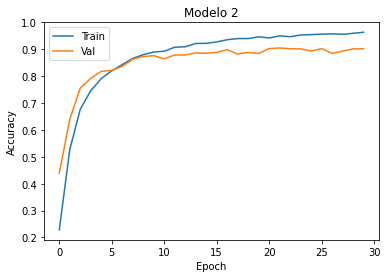

In [ ]:
plot_acc(history2,"Modelo 2")

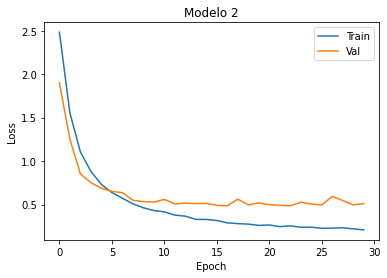

In [ ]:
plot_loss(history2,"Modelo 2")

Comparando los resultados de entrenamiento y test, se puede ver como en el test se obtienen mejores metricas debido a que como se comenta en el enunciado, las imagenes de test son más sencillas de predecir.

A continuación podemos analizar los errores cometidos por uno de los modelos entrenados con el objetivo de poder analizar de forma visual el motivo de los fallos.

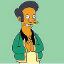

Prediccion:  charles_montgomery_burns
Correcto:  apu_nahasapeemapetilon


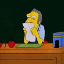

Prediccion:  charles_montgomery_burns
Correcto:  moe_szyslak


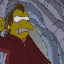

Prediccion:  ned_flanders
Correcto:  nelson_muntz


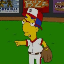

Prediccion:  edna_krabappel
Correcto:  milhouse_van_houten


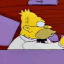

Prediccion:  homer_simpson
Correcto:  abraham_grampa_simpson


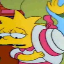

Prediccion:  bart_simpson
Correcto:  lisa_simpson


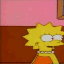

Prediccion:  bart_simpson
Correcto:  lisa_simpson


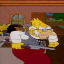

Prediccion:  homer_simpson
Correcto:  abraham_grampa_simpson


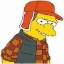

Prediccion:  comic_book_guy
Correcto:  nelson_muntz


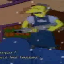

Prediccion:  charles_montgomery_burns
Correcto:  moe_szyslak


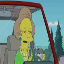

Prediccion:  homer_simpson
Correcto:  edna_krabappel


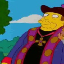

Prediccion:  principal_skinner
Correcto:  comic_book_guy


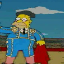

Prediccion:  homer_simpson
Correcto:  abraham_grampa_simpson


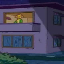

Prediccion:  principal_skinner
Correcto:  edna_krabappel


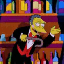

Prediccion:  charles_montgomery_burns
Correcto:  moe_szyslak


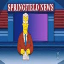

Prediccion:  principal_skinner
Correcto:  kent_brockman


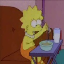

Prediccion:  bart_simpson
Correcto:  lisa_simpson


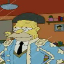

Prediccion:  charles_montgomery_burns
Correcto:  abraham_grampa_simpson


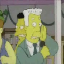

Prediccion:  charles_montgomery_burns
Correcto:  kent_brockman


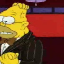

Prediccion:  homer_simpson
Correcto:  abraham_grampa_simpson


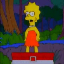

Prediccion:  bart_simpson
Correcto:  lisa_simpson


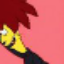

Prediccion:  ned_flanders
Correcto:  sideshow_bob


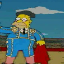

Prediccion:  homer_simpson
Correcto:  abraham_grampa_simpson


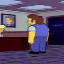

Prediccion:  comic_book_guy
Correcto:  nelson_muntz


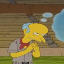

Prediccion:  moe_szyslak
Correcto:  charles_montgomery_burns


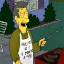

Prediccion:  moe_szyslak
Correcto:  principal_skinner


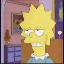

Prediccion:  bart_simpson
Correcto:  lisa_simpson


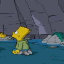

Prediccion:  principal_skinner
Correcto:  bart_simpson


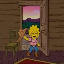

Prediccion:  bart_simpson
Correcto:  lisa_simpson


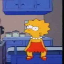

Prediccion:  bart_simpson
Correcto:  lisa_simpson


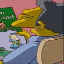

Prediccion:  homer_simpson
Correcto:  moe_szyslak


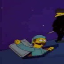

Prediccion:  homer_simpson
Correcto:  ned_flanders


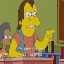

Prediccion:  comic_book_guy
Correcto:  nelson_muntz


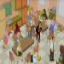

Prediccion:  charles_montgomery_burns
Correcto:  edna_krabappel


In [ ]:
showImageError(model2)

Revisando los errores vemos que en algunos de ellos el personaje no están con la ropa habitual, tambien confunde mucho a Homer con el abuelo, que son dos personajes con mucho parecido, en otras el personaje aparece de espaldas o muy pequeño en la imágen.

También, como puede verse en uno de los casos hay un error en el etiquetado ya que el personaje que aparece de espaldas es Snake y no Nelson.

Podemos concluir que los niveles de precisión alcanzados en los distintos modelos son satisfactorios y las tasas de error son aceptables. Como se ha demostrado estos errores vienen dados por la gran variedad de planos fotográficos, escenarios, vestimenta de los personajes, entre otros.
